# Named Entity Recognition (NER)
The dataset used in this project is sourced from Kaggle (https://www.kaggle.com/datasets/naseralqaydeh/named-entity-recognition-ner-corpus/data?select=ner.csv) and is derived from the Groningen Meaning Bank (GMB) corpus. This dataset is structured to facilitate the training and evaluation of Named Entity Recognition (NER) models. It consists of tokenized text sequences, where each token is labeled with a corresponding entity class.

## Required Installation
This installs the necessary libraries listed in the requirements.txt file from the specified GitHub repository.



In [71]:
# Required libraries from the Requirements.txt
!pip install -r https://raw.githubusercontent.com/Daniel-Rossi-16/NLP_3_NER/main/requirements.txt

## Upload Dataset
This section clones the GitHub repository containing the project files and navigates to the cloned directory.



In [72]:
import os

# Clone the GitHub Repository
print("\nCloning the repository...")
!git clone https://github.com/Daniel-Rossi-16/NLP_3_NER.git

# Navigate to the Cloned Repository
print("\nNavigating to the cloned repository...")
%cd NLP_3_NER
print(f"Current working directory: {os.getcwd()}")

# List Files in the Repository
print("\nListing files in the repository...")
!ls

# Display current directory again for verification
print(f"\nYou are now in the directory: {os.path.abspath(os.getcwd())}")


Cloning the repository...
Cloning into 'NLP_3_NER'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 52 (delta 18), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (52/52), 4.23 MiB | 5.02 MiB/s, done.
Resolving deltas: 100% (18/18), done.

Navigating to the cloned repository...
/kaggle/working/NLP_3_NER/NLP_3_NER/NLP_3_NER/NLP_3_NER
Current working directory: /kaggle/working/NLP_3_NER/NLP_3_NER/NLP_3_NER/NLP_3_NER

Listing files in the repository...
Error.ipynb  ner-assessment3.ipynb  README.md
LICENSE      ner.csv		    requirements.txt

You are now in the directory: /kaggle/working/NLP_3_NER/NLP_3_NER/NLP_3_NER/NLP_3_NER


## Exploratory Data Analysis (EDA)
Loads the dataset into a DataFrame and displays the first few rows, dataset information, and checks for missing values.



In [73]:
# Load the Dataset into a DataFrame
import pandas as pd

# Load the dataset from the cloned repository
pd.set_option('display.max_colwidth', None)
df = pd.read_csv("ner.csv")

# Display the first few rows
df.head(20)

,Sentence #,Sentence,POS,Tag
0,Sentence: 1,Thousands of demonstrators have marched through London to protest the war in Iraq and demand the withdrawal of British troops from that country .,"['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP', 'TO', 'VB', 'DT', 'NN', 'IN', 'NNP', 'CC', 'VB', 'DT', 'NN', 'IN', 'JJ', 'NNS', 'IN', 'DT', 'NN', '.']","['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O']"
1,Sentence: 2,"Families of soldiers killed in the conflict joined the protesters who carried banners with such slogans as "" Bush Number One Terrorist "" and "" Stop the Bombings . ""","['NNS', 'IN', 'NNS', 'VBN', 'IN', 'DT', 'NN', 'VBD', 'DT', 'NNS', 'WP', 'VBD', 'NNS', 'IN', 'JJ', 'NNS', 'IN', '``', 'NNP', 'NN', 'CD', 'NN', '``', 'CC', '``', 'VB', 'DT', 'NNS', '.', '``']","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-per', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']"
2,Sentence: 3,They marched from the Houses of Parliament to a rally in Hyde Park .,"['PRP', 'VBD', 'IN', 'DT', 'NNS', 'IN', 'NN', 'TO', 'DT', 'NN', 'IN', 'NNP', 'NNP', '.']","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'I-geo', 'O']"
3,Sentence: 4,"Police put the number of marchers at 10,000 while organizers claimed it was 1,00,000 .","['NNS', 'VBD', 'DT', 'NN', 'IN', 'NNS', 'IN', 'CD', 'IN', 'NNS', 'VBD', 'PRP', 'VBD', 'CD', '.']","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']"
4,Sentence: 5,The protest comes on the eve of the annual conference of Britain 's ruling Labor Party in the southern English seaside resort of Brighton .,"['DT', 'NN', 'VBZ', 'IN', 'DT', 'NN', 'IN', 'DT', 'JJ', 'NN', 'IN', 'NNP', 'POS', 'VBG', 'NNP', 'NNP', 'IN', 'DT', 'JJ', 'JJ', 'NN', 'NN', 'IN', 'NNP', '.']","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'B-org', 'I-org', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'B-geo', 'O']"
5,Sentence: 6,"The party is divided over Britain 's participation in the Iraq conflict and the continued deployment of 8,500 British troops in that country .","['DT', 'NN', 'VBZ', 'VBN', 'IN', 'NNP', 'POS', 'NN', 'IN', 'DT', 'NNP', 'NN', 'CC', 'DT', 'JJ', 'NN', 'IN', 'CD', 'JJ', 'NNS', 'IN', 'DT', 'NN', '.']","['O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O']"
6,Sentence: 7,"The London march came ahead of anti-war protests today in other cities , including Rome , Paris , and Madrid .","['DT', 'NNP', 'NN', 'VBD', 'RB', 'IN', 'JJ', 'NNS', 'NN', 'IN', 'JJ', 'NNS', ',', 'VBG', 'NNP', ',', 'NNP', ',', 'CC', 'NNP', '.']","['O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'B-geo', 'O', 'O', 'B-geo', 'O']"
7,Sentence: 8,The International Atomic Energy Agency is to hold second day of talks in Vienna Wednesday on how to respond to Iran 's resumption of low-level uranium conversion .,"['DT', 'NNP', 'NNP', 'NNP', 'NNP', 'VBZ', 'TO', 'VB', 'JJ', 'NN', 'IN', 'NNS', 'IN', 'NNP', 'NNP', 'IN', 'WRB', 'TO', 'VB', 'TO', 'NNP', 'POS', 'NN', 'IN', 'JJ', 'NN', 'NN', '.']","['O', 'B-org', 'I-org', 'I-org', 'I-org', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'B-tim', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'O']"
8,Sentence: 9,Iran this week restarted parts of the conversion process at its Isfahan nuclear plant .,"['NNP', 'DT', 'NN', 'VBD', 'NNS', 'IN', 'DT', 'NN', 'NN', 'IN', 'PRP$', 'NNP', 'JJ', 'NN', '.']","['B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O']"
9,Sentence: 10,"Iranian officials say they expect to get access to sealed sensitive parts of the plant Wednesday , after an IAEA surveillance system begins functioning .","['JJ', 'NNS', 'VBP', 'PRP', 'VBP', 'TO', 'VB', 'NN', 'TO', 'JJ', 'JJ', 'NNS', 'IN', 'DT', 'NN', 'NNP', ',', 'IN', 'DT', 'NNP', 'NN', 'NN', 'VBZ', 'VBG', '.']","['B-gpe', 'O', 

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47959 entries, 0 to 47958
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sentence #  47959 non-null  object
 1   Sentence    47959 non-null  object
 2   POS         47959 non-null  object
 3   Tag         47959 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB


In [75]:
df.isna().sum()

Sentence #    0
Sentence      0
POS           0
Tag           0
dtype: int64

## Data Preprocessing
The dataset is shuffled and split into training (80%), validation (10%), and test (10%) sets. Defines features (Sentence and POS) and labels (Tag).

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('ner.csv')
#df = df.head(200)

# Shuffle the data
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Split into training (80%), validation (10%), and test (10%)
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
valid_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Define features (X) and labels (y)
# Combine 'Sentence' and 'POS' as features
X_train = train_df[['Sentence', 'POS']]  # Use both 'Sentence' and 'POS'
y_train = train_df['Tag']  # 'Tag' is the label (NER tags)
X_val = valid_df[['Sentence', 'POS']]
y_val = valid_df['Tag']
X_test = test_df[['Sentence', 'POS']]
y_test = test_df['Tag']

# Check dataset shapes
print(f"Training set size: {train_df.shape}")
print(f"Training set: X={X_train.shape}, y={y_train.shape}")
print(f"\nValidation set size: {valid_df.shape}")
print(f"Validation set: X={X_val.shape}, y={y_val.shape}")
print(f"\nTest set size: {test_df.shape}")
print(f"Test set: X={X_test.shape}, y={y_test.shape}")

Training set size: (38367, 4)
Training set: X=(38367, 2), y=(38367,)

Validation set size: (4796, 4)
Validation set: X=(4796, 2), y=(4796,)

Test set size: (4796, 4)
Test set: X=(4796, 2), y=(4796,)


## Data Analysis and Visualization

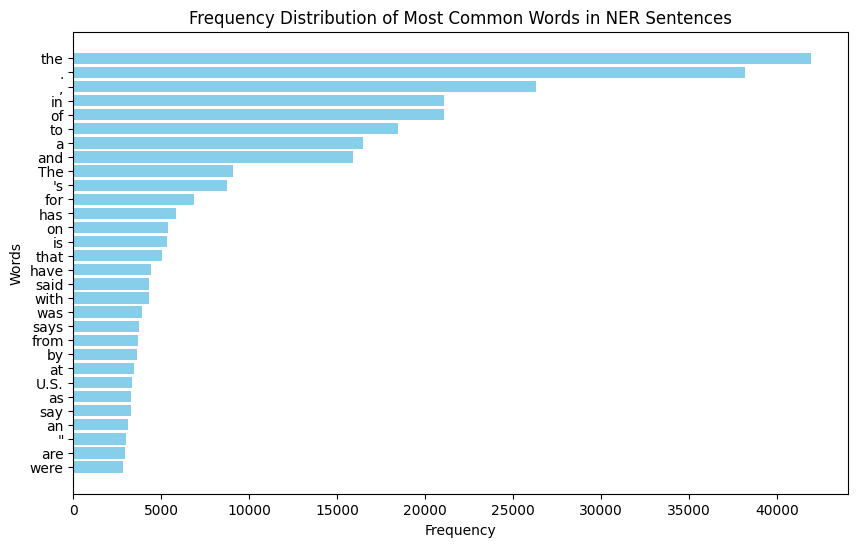

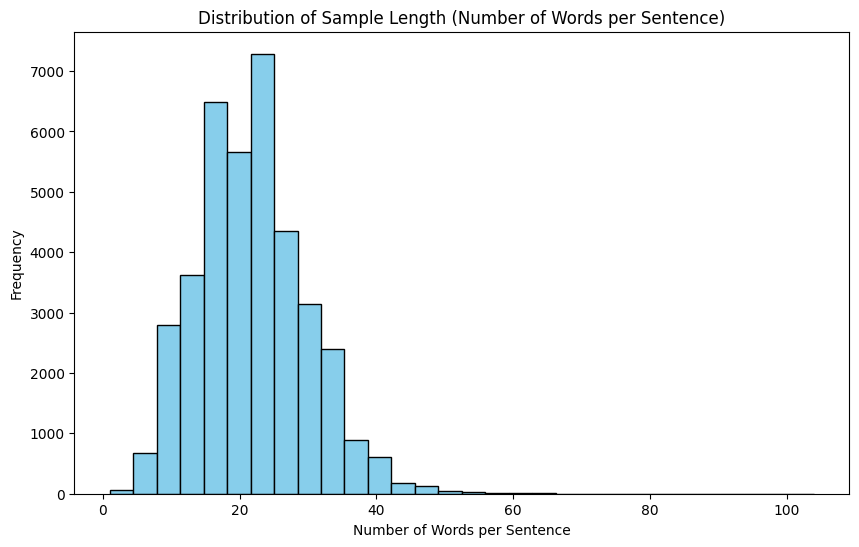


Key Metrics
Number of Samples: 38367
Number of Classes: 27106
Number of Samples per Class:
Tag
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']                                                                                                                                                   355
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']                                                                                                                                    343
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']                                                                                                                                         340
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']                                                                                                                               325
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']                              

In [77]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

# 1. Number of samples
num_samples = len(train_df)

# 2. Number of classes (NER tags)
num_classes = train_df['Tag'].nunique()

# 3. Number of samples per class (NER tags)
samples_per_class = train_df['Tag'].value_counts()

# 4. Number of words per sample (calculate the length of each sentence in words)
train_df['word_count'] = train_df['Sentence'].apply(lambda x: len(x.split()))
median_words_per_sample = np.median(train_df['word_count'])
average_words_per_sample = np.mean(train_df['word_count'])

# 5. Frequency distribution of words
all_words = ' '.join(train_df['Sentence']).split()
word_freq = Counter(all_words)
most_common_words = word_freq.most_common(30)
words, counts = zip(*most_common_words)

# 5.1 Plot the frequency distribution
plt.figure(figsize=(10, 6))
plt.barh(words, counts, color='skyblue')
plt.title('Frequency Distribution of Most Common Words in NER Sentences')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most frequent words at the top
plt.show()

# 6. Distribution of sample length (number of words per sentence)
plt.figure(figsize=(10, 6))
plt.hist(train_df['word_count'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Sample Length (Number of Words per Sentence)')
plt.xlabel('Number of Words per Sentence')
plt.ylabel('Frequency')
plt.show()

# Print the key metrics
print("\nKey Metrics")
print(f"Number of Samples: {num_samples}")
print(f"Number of Classes: {num_classes}")
print(f"Number of Samples per Class:\n{samples_per_class}")
print(f"Median Number of Words per Sentence: {median_words_per_sample}")
print(f"Average Number of Words per Sentence: {average_words_per_sample}")
print(f"Most Common Words and their Frequencies: {most_common_words}")

In [78]:

# 1. Calculate the total number of samples
num_samples = len(train_df)

# 2. Calculate the median number of words per sample
median_words_per_sample = train_df['word_count'].median()

# 3. Calculate the ratio (Number of Samples / Median Number of Words per Sample)
samples_to_median_words_ratio = num_samples / median_words_per_sample

# Print the result
print(f"Number of Samples: {num_samples}")
print(f"Median Number of Words per Sample: {median_words_per_sample}")
print(f"Number of Samples / Median Number of Words per Sample Ratio: {samples_to_median_words_ratio}")

Number of Samples: 38367
Median Number of Words per Sample: 21.0
Number of Samples / Median Number of Words per Sample Ratio: 1827.0


## Encoding
Encodes the NER tags using LabelEncoder. Tokenizes the Sentence and POS columns and pads the sequences to ensure uniform input length.

In [79]:
import random

# Convert y_train to a list
y_train_list = list(y_train)

# Select 3 random elements from y_train_list
random_elements = random.sample(y_train_list, 3)

# Print the selected random elements with item numbers
for idx, element in enumerate(random_elements, start=1):
    print(f"Item {idx}: {element}")




Item 1: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-org', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
Item 2: ['O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-tim', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
Item 3: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


Flattening is necessary to create a single list of all tags, which can then be used to fit the LabelEncoder. This step combines all the lists of tags from y_train, y_val, and y_test into a single list. This is done using a list comprehension. Once you have the flattened list of tags, you can apply the LabelEncoder to fit all unique tags and map them to integer values. (*tag_encoder* knows how to map each unique tag to an integer). By fitting the encoder on the complete set of tags, we guarantee that it can accurately encode and decode the tags throughout the model training and evaluation process.


For example:

AS IS: [['B-per', 'O', 'O'], ['B-org', 'I-org', 'O']]

TO BE: ['B-per', 'O', 'O', 'B-org', 'I-org', 'O']

In [80]:
import ast

# Convert the string representation back to lists
y_train = [ast.literal_eval(tags_str) for tags_str in y_train]
y_val =  [ast.literal_eval(tags_str) for tags_str in y_val]
y_test =  [ast.literal_eval(tags_str) for tags_str in y_test]

# Flatten all tags from y_train, y_val, y_test for fitting the encoder
all_tags   = [tag for sublist in (y_train + y_val + y_test) for tag in sublist]
print(f"All TAG united list: {all_tags [:30]}")


All TAG united list: ['B-per', 'I-per', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-tim', 'I-tim', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


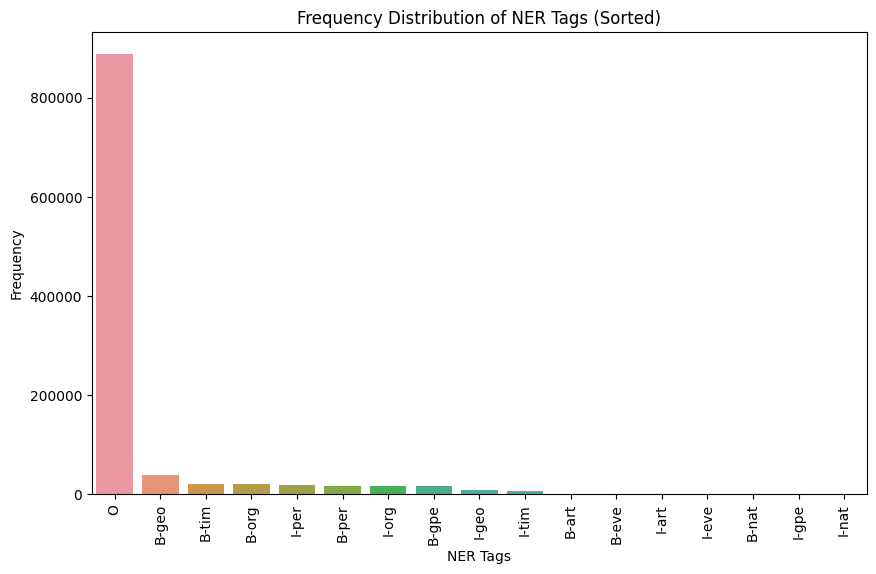

In [81]:
# Visualize the Distribution of Tags PART 1
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Count the occurrences of each tag
tag_counts = Counter(all_tags)

# Sort the tags by frequency in descending order
sorted_tag_counts = sorted(tag_counts.items(), key=lambda x: x[1], reverse=True)

# Create separate lists for the sorted tag names and frequencies
sorted_tag_names, sorted_tag_freqs = zip(*sorted_tag_counts)

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=list(sorted_tag_names), y=list(sorted_tag_freqs))
plt.title("Frequency Distribution of NER Tags (Sorted)")
plt.xlabel("NER Tags")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()



/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


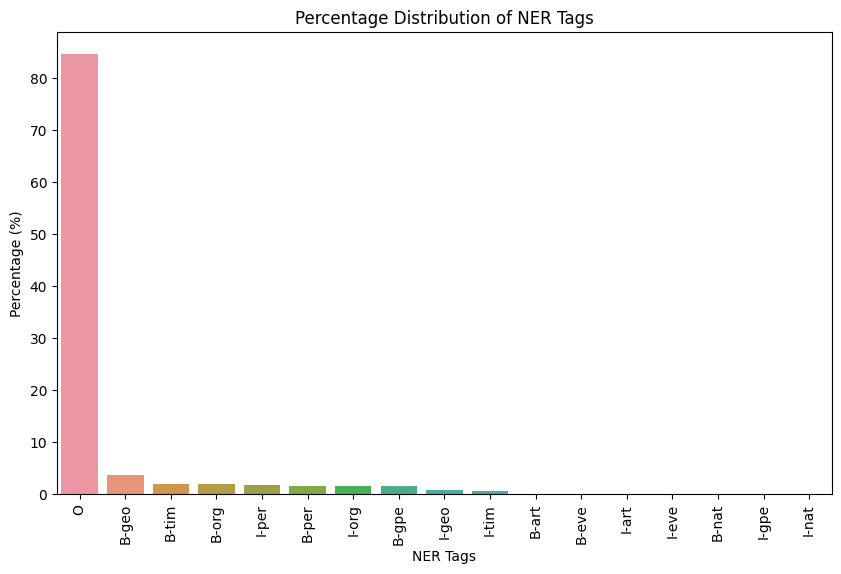

O: 84.68%
B-geo: 3.59%
B-tim: 1.94%
B-org: 1.92%
I-per: 1.65%
B-per: 1.62%
I-org: 1.60%
B-gpe: 1.51%
I-geo: 0.71%
I-tim: 0.62%
B-art: 0.04%
B-eve: 0.03%
I-art: 0.03%
I-eve: 0.02%
B-nat: 0.02%
I-gpe: 0.02%
I-nat: 0.00%


In [82]:
# Visualize the Distribution of Tags PART 2
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Count the occurrences of each tag
tag_counts = Counter(all_tags)

# Calculate the percentage for each tag
total_tags = len(all_tags)
tag_percentages = {tag: (count / total_tags) * 100 for tag, count in tag_counts.items()}

# Sort tags by frequency in descending order
sorted_tags = sorted(tag_percentages.items(), key=lambda x: x[1], reverse=True)
sorted_tags_names, sorted_tags_percentages = zip(*sorted_tags)

# Plot the distribution with percentages
plt.figure(figsize=(10, 6))
sns.barplot(x=list(sorted_tags_names), y=list(sorted_tags_percentages))
plt.title("Percentage Distribution of NER Tags")
plt.xlabel("NER Tags")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=90)
plt.show()

# Display the sorted tag percentages (optional)
for tag, percentage in zip(sorted_tags_names, sorted_tags_percentages):
    print(f"{tag}: {percentage:.2f}%")


This part of the code is crucial for preparing the data for training a machine learning model. It involves:

- Encoding categorical NER tags into numerical values.
- Tokenizing sentences and POS tags into sequences of integers.
- Padding sequences to ensure uniform input length for the model.

The `LabelEncoder` was applied only to the NER tags because they are discrete categorical labels, which makes them suitable for this encoding method. On the other hand, the `Sentence` and `POS` columns require tokenization, as they consist of words that need to be converted into numerical representations. Tokenization helps preserve the semantic meaning of the words. Thus, the NER tags are encoded using `LabelEncoder`, while the `Sentence` and `POS` columns are tokenized to generate meaningful word representations for the LSTM model.

In [83]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Initialize the LabelEncoder
tag_encoder = LabelEncoder()

# Label encoding for tags
tag_encoder.fit(all_tags)

# Encode tags as numbers
y_train_encoded = [tag_encoder.transform(tag_list) for tag_list in y_train]
y_val_encoded = [tag_encoder.transform(tag_list) for tag_list in y_val]
y_test_encoded = [tag_encoder.transform(tag_list) for tag_list in y_test]


# Tokenization of 'Sentence'
sentence_tokenizer = Tokenizer(oov_token="<OOV>")
sentence_tokenizer.fit_on_texts(X_train['Sentence'])

X_train_sentences = sentence_tokenizer.texts_to_sequences(X_train['Sentence'])
X_val_sentences = sentence_tokenizer.texts_to_sequences(X_val['Sentence'])
X_test_sentences = sentence_tokenizer.texts_to_sequences(X_test['Sentence'])

# Tokenization of 'POS' tags
pos_tokenizer = Tokenizer(oov_token="<OOV>")
pos_tokenizer.fit_on_texts(X_train['POS'])

X_train_pos = pos_tokenizer.texts_to_sequences(X_train['POS'])
X_val_pos = pos_tokenizer.texts_to_sequences(X_val['POS'])
X_test_pos = pos_tokenizer.texts_to_sequences(X_test['POS'])

# Determine maximum sequence length
max_length = max(max(len(seq) for seq in X_train_sentences),
                 max(len(seq) for seq in X_val_sentences),
                 max(len(seq) for seq in X_test_sentences))

# Pad sequences for uniform input length
X_train_padded = pad_sequences(X_train_sentences, maxlen=max_length, padding='post')
X_val_padded = pad_sequences(X_val_sentences, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_sentences, maxlen=max_length, padding='post')

X_train_pos_padded = pad_sequences(X_train_pos, maxlen=max_length, padding='post')
X_val_pos_padded = pad_sequences(X_val_pos, maxlen=max_length, padding='post')
X_test_pos_padded = pad_sequences(X_test_pos, maxlen=max_length, padding='post')

y_train_padded = pad_sequences(y_train_encoded, maxlen=max_length, padding='post')
y_val_padded = pad_sequences(y_val_encoded, maxlen=max_length, padding='post')
y_test_padded = pad_sequences(y_test_encoded, maxlen=max_length, padding='post')

# Print final dataset shapes
print(f"X_train shape: {X_train_padded.shape}, POS shape: {X_train_pos_padded.shape}, y_train shape: {y_train_padded.shape}")
print(f"X_val shape: {X_val_padded.shape}, POS shape: {X_val_pos_padded.shape}, y_val shape: {y_val_padded.shape}")
print(f"X_test shape: {X_test_padded.shape}, POS shape: {X_test_pos_padded.shape}, y_test shape: {y_test_padded.shape}")

X_train shape: (38367, 89), POS shape: (38367, 89), y_train shape: (38367, 89)
X_val shape: (4796, 89), POS shape: (4796, 89), y_val shape: (4796, 89)
X_test shape: (4796, 89), POS shape: (4796, 89), y_test shape: (4796, 89)


## Train a Model
Defines a Bidirectional LSTM model for NER, combining sentence and POS embeddings.

Importing Libraries
This section imports necessary libraries from TensorFlow and Keras. These libraries are used to build and train deep learning models.

Defining Input Shapes
Here, we define the input shapes for the sentences and POS tags. max_length is the length of the longest sequence in the dataset. Both inputs are of type tf.int32.

Embedding Layers
Embedding layers convert the integer sequences into dense vectors of fixed size.
- sentence_embedding converts sentences into 128-dimensional vectors.
- pos_embedding converts POS tags into 64-dimensional vectors.

Combining Embeddings
This line concatenates the sentence and POS embeddings to create a combined representation.

Bidirectional LSTM Layer
A Bidirectional LSTM layer processes the combined embeddings.
- 128 units in the LSTM.
- return_sequences=True ensures that the output is a sequence.
- dropout=0.4 applies dropout regularization to prevent overfitting.
- kernel_regularizer=l2(0.01) applies L2 regularization to the kernel weights.

Output Layer
The output layer predicts the NER tags.
- Dense(len(tag_encoder.classes_)) creates a dense layer with units equal to the number of unique NER tags.
- activation='softmax' applies the softmax activation function to output probabilities for each tag.

Creating the Model
This line creates the model by specifying the inputs and outputs.

Compiling the Model
The model is compiled with:
- Adam optimizer with a learning rate of 0.001.
- sparse_categorical_crossentropy loss function, suitable for multi-class classification.
- accuracy as the evaluation metric.

Model Summary
This line prints a summary of the model architecture, including the layers, output shapes, and number of parameters.

Model Summary Output
This output shows the detailed architecture of the model, including the layers, their output shapes, and the number of parameters.



In [84]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Bidirectional, Dense, Dropout, Masking
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2


# Define the input shape for both Sentence and POS
sentence_input = Input(shape=(max_length,), dtype=tf.int32, name='sentence_input')
pos_input = Input(shape=(max_length,), dtype=tf.int32, name='pos_input')

# Embedding layers for 'Sentence' and 'POS'
sentence_embedding = Embedding(input_dim=len(sentence_tokenizer.word_index) + 1, 
                               output_dim=128, input_length=max_length)(sentence_input)

pos_embedding = Embedding(input_dim=len(pos_tokenizer.word_index) + 1, 
                          output_dim=64, input_length=max_length)(pos_input)

# Combine both sentence and POS embeddings
merged = tf.keras.layers.concatenate([sentence_embedding, pos_embedding])

# Add a Bidirectional LSTM layer
lstm_out = Bidirectional(LSTM(128, return_sequences=True, dropout=0.4, kernel_regularizer=l2(0.01)))(merged)

# Output layer for NER tag prediction
output = Dense(len(tag_encoder.classes_), activation='softmax')(lstm_out)

# Create the model
model = Model(inputs=[sentence_input, pos_input], outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ sentence_input            │ (None, 89)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pos_input (InputLayer)    │ (None, 89)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_4 (Embedding)   │ (None, 89, 128)        │      3,290,496 │ sentence_input[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_5 (Embedding)   │ (None, 89, 64)         │          2,496 │ pos_input[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 89, 192)        │              0 │ embedding_4[0][0],     │
│ (Concatenate)             │                        │                │ embedding_5[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_2           │ (None, 89, 256)        │        328,704 │ concatenate_2[0][0]    │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 89, 17)         │          4,369 │ bidirectional_2[0][0]  │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 3,626,065 (13.83 MB)

 Trainable params: 3,626,065 (13.83 MB)

 Non-trainable params: 0 (0.00 B)

## Train a Model
Trains the model using the training data and validates it using the validation data. Early stopping is used to prevent overfitting.



In [85]:
# Train the model

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


history = model.fit(
    [X_train_padded, X_train_pos_padded], y_train_padded,
    validation_data=([X_val_padded, X_val_pos_padded], y_val_padded),
    epochs=10, batch_size=32,
    callbacks=[early_stopping]
)


Epoch 1/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.9444 - loss: 0.8429 - val_accuracy: 0.9702 - val_loss: 0.1277
Epoch 2/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.9751 - loss: 0.0982 - val_accuracy: 0.9790 - val_loss: 0.0812
Epoch 3/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.9800 - loss: 0.0778 - val_accuracy: 0.9823 - val_loss: 0.0696
Epoch 4/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.9828 - loss: 0.0665 - val_accuracy: 0.9827 - val_loss: 0.0713
Epoch 5/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.9844 - loss: 0.0611 - val_accuracy: 0.9842 - val_loss: 0.0614
Epoch 6/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.9850 - loss: 0.0605 - val_accuracy: 0.9847 - val_loss: 0.0587
Epoch 7/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.9854 - loss: 0.0695 - val_accuracy: 0.9852 - val_loss: 0.0606
Epoch 8/10
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.9867 -

## Evaluation and Conclusion
Evaluates the model on the test set and prints the test accuracy.



In [86]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(
    [X_test_padded, X_test_pos_padded], y_test_padded
)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9865 - loss: 0.0530
Test accuracy: 98.65%


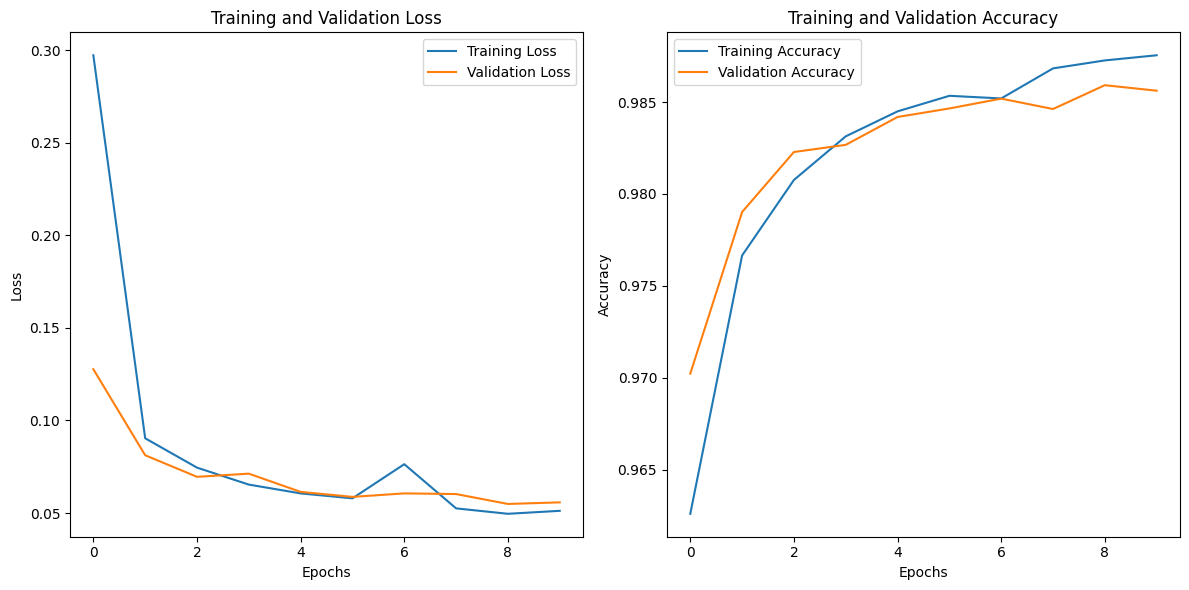

In [87]:
# Visualization of Training History
import matplotlib.pyplot as plt

# Extract the training history
history_dict = history.history

# Plot training and validation loss
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [88]:
def plot_predictions(X_test_data, y_test_data, predictions, n=5):
    # Choose n samples randomly
    indices = np.random.choice(len(X_test_data), n, replace=False)
    
    for i in indices:
        # Get the true labels and predicted labels
        true_labels = y_test_data[i]
        predicted_labels = np.argmax(predictions[i], axis=-1)
        
        # Get the length of the true sentence (excluding padding)
        true_length = np.sum(true_labels != 0)  # Assuming 0 is the padding value
        
        # Truncate the predicted labels to match the true sentence length
        predicted_labels = predicted_labels[:true_length]
        
        # Convert the numeric labels back to the original tag names
        true_tags = tag_encoder.inverse_transform(true_labels[:true_length])
        predicted_tags = tag_encoder.inverse_transform(predicted_labels)

        # Print the sentence and tags
        print(f"\nSentence: {X_test_data.iloc[i]['Sentence']}")
        print(f"True Tags:\n{true_tags}")
        print(f"Predicted Tags:\n{predicted_tags}")

# Predict using the trained model
predictions = model.predict([X_test_padded, X_test_pos_padded])

# Visualize predictions for 5 random test samples
plot_predictions(X_test, y_test_encoded, predictions, n=5)


150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

Sentence: Saudi Arabia and most Gulf Arab states have announced they will celebrate the Muslim holiday of Eid al-Fitr on Friday to mark the end of the holy fasting month of Ramadan .
True Tags:
['B-per' 'I-per' 'O' 'O' 'B-geo' 'I-geo' 'O' 'O' 'O' 'O' 'O' 'O' 'O'
 'B-org' 'I-org' 'I-org' 'I-org' 'I-org' 'O' 'B-tim' 'O' 'O' 'O' 'B-tim'
 'I-tim' 'O' 'B-tim' 'I-tim' 'O' 'B-tim' 'I-tim' 'O']
Predicted Tags:
['B-per' 'I-org' 'O' 'O' 'B-geo' 'I-geo' 'O' 'O' 'O' 'O' 'O' 'O' 'O'
 'B-org' 'O' 'I-org' 'B-org' 'I-org' 'O' 'B-tim' 'O' 'O' 'O' 'O' 'O' 'O'
 'O' 'O' 'O' 'O' 'B-geo' 'O']

Sentence: The government says the group has links to terror organizations abroad .
True Tags:
['O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O']
Predicted Tags:
['O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O']

Sentence: U.S. health officials have called for updated quarantine procedures , including better access to airline and ship passenger lists , to protect Americans from 